In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

gender = pd.read_csv("data/gender_submission.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* EDA 과정
    1. 데이터 수집
    2. 시각화 탐색
    3. 패턴 도출
    4. 인사이트 발굴

In [ ]:
train.isnull().sum()
train["Sex"].value_counts()
sns.countplot(x = "SibSp", data = train)

In [34]:
train["Died"] = 1-train["Survived"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<AxesSubplot:xlabel='Pclass', ylabel='count'>

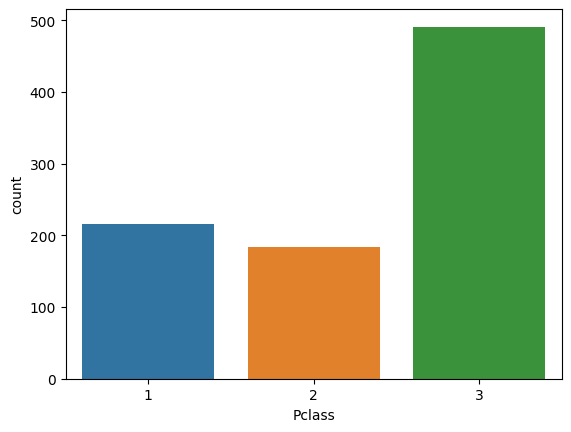

In [35]:
below_30 = train[(train["Survived"] == 1) & (train["Age"] <= 30)]

# 30대 이하의 살아남은 남성과 여성의 표
sns.countplot(x = "Pclass",  data = train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

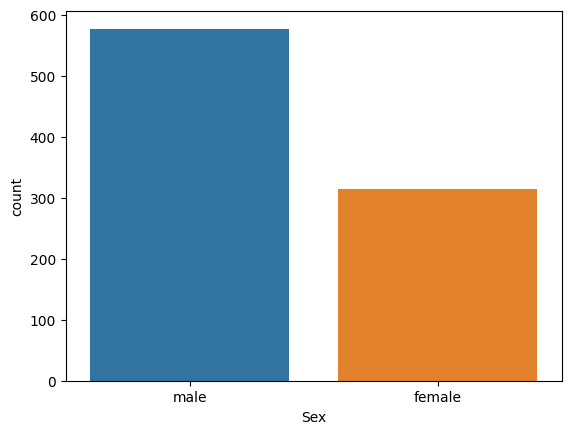

In [36]:
sns.countplot(x="Sex", data = train)

In [37]:
attribute = list(train.columns)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

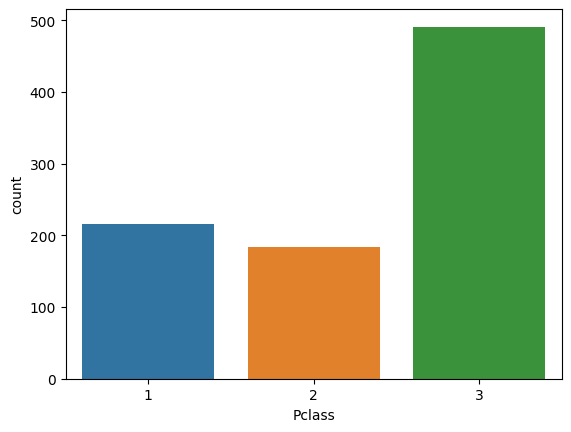

In [38]:
sns.countplot(data = train,  x = attribute[2] )

In [39]:
woman = train.loc[train.Sex == "female"]["Survived"]
woman_survived_rate = sum(woman)/len(woman)

print(f"Woman Survived Rate: {woman_survived_rate:.2f}")


Woman Survived Rate: 0.74


In [40]:
y = train["Survived"]
features = ["Pclass", "Sex", "Parch", "SibSp"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [41]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)


RandomForestClassifier(max_depth=5, random_state=1)